In [1]:
import pandas as pd

# Load the dataset
file_path = 'EZ_associative_learning_transformed_part_1.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


Experiment   v1_mean   v2_mean   v3_mean  \
0  1000_associative_priming_part_1.dat  1.635332  1.627167 -1.970332   
1  1001_associative_priming_part_1.dat  2.341084  2.271870 -2.525586   
2  1002_associative_priming_part_1.dat  1.871328  2.085420 -2.046255   
3  1003_associative_priming_part_1.dat  2.259589  2.041653 -2.859057   
4  1004_associative_priming_part_1.dat  1.816032  1.321297 -1.772583   

    v4_mean    a_mean  ndt1_mean  ndt2_mean  ndt3_mean  ndt4_mean  ...  \
0 -1.790786  1.295439   0.460809   0.512835   0.581686   0.524307  ...   
1 -2.231322  1.667652   0.487246   0.509897   0.566825   0.547781  ...   
2 -1.878856  1.493206   0.428982   0.520734   0.544821   0.537896  ...   
3 -2.332323  1.663142   0.455531   0.518839   0.544248   0.517613  ...   
4 -2.070680  1.128478   0.427746   0.451682   0.490703   0.500813  ...   

                                                q4_E    ID  Task    Session  \
0  [1.111 1.097 1.088 1.239 1.039 1.055 1.287 1.863]  1000   APT  Session 1   
1                                      [1.456 1.232]  1001   APT  Session 1   
2                    [1.078 1.096 2.17  1.591 1.159]  1002   APT  Session 1   
3                                      [0.879 1.127]  1003   APT  Session 1   
4  [0.679 0.808 0.694 0.68  0.767 0.799 0.711 0.927]  1004   APT  Session 1   

   alpha_shifted  alpha_clipped alpha_arcsin alpha_mean_boxcox_after_arcsin  \
0       0.548384       0.548384     0.833858                      -0.149186   
1       0.939694       0.939694     1.322686                       0.389186   
2       0.851340       0.851340     1.174977                       0.194319   
3       0.956168       0.956168     1.359875                       0.442806   
4       0.505595       0.505595     0.790994                      -0.182275   

  accuracy_arcsin accuracy_percentage_boxcox_after_arcsin  
0        1.279465                                0.441066  
1        1.420038                                0.825259  
2        1.338726                                0.586882  
3        1.427449                                0.849380  
4        1.261363                                0.400797  

[5 rows x 35 columns]

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

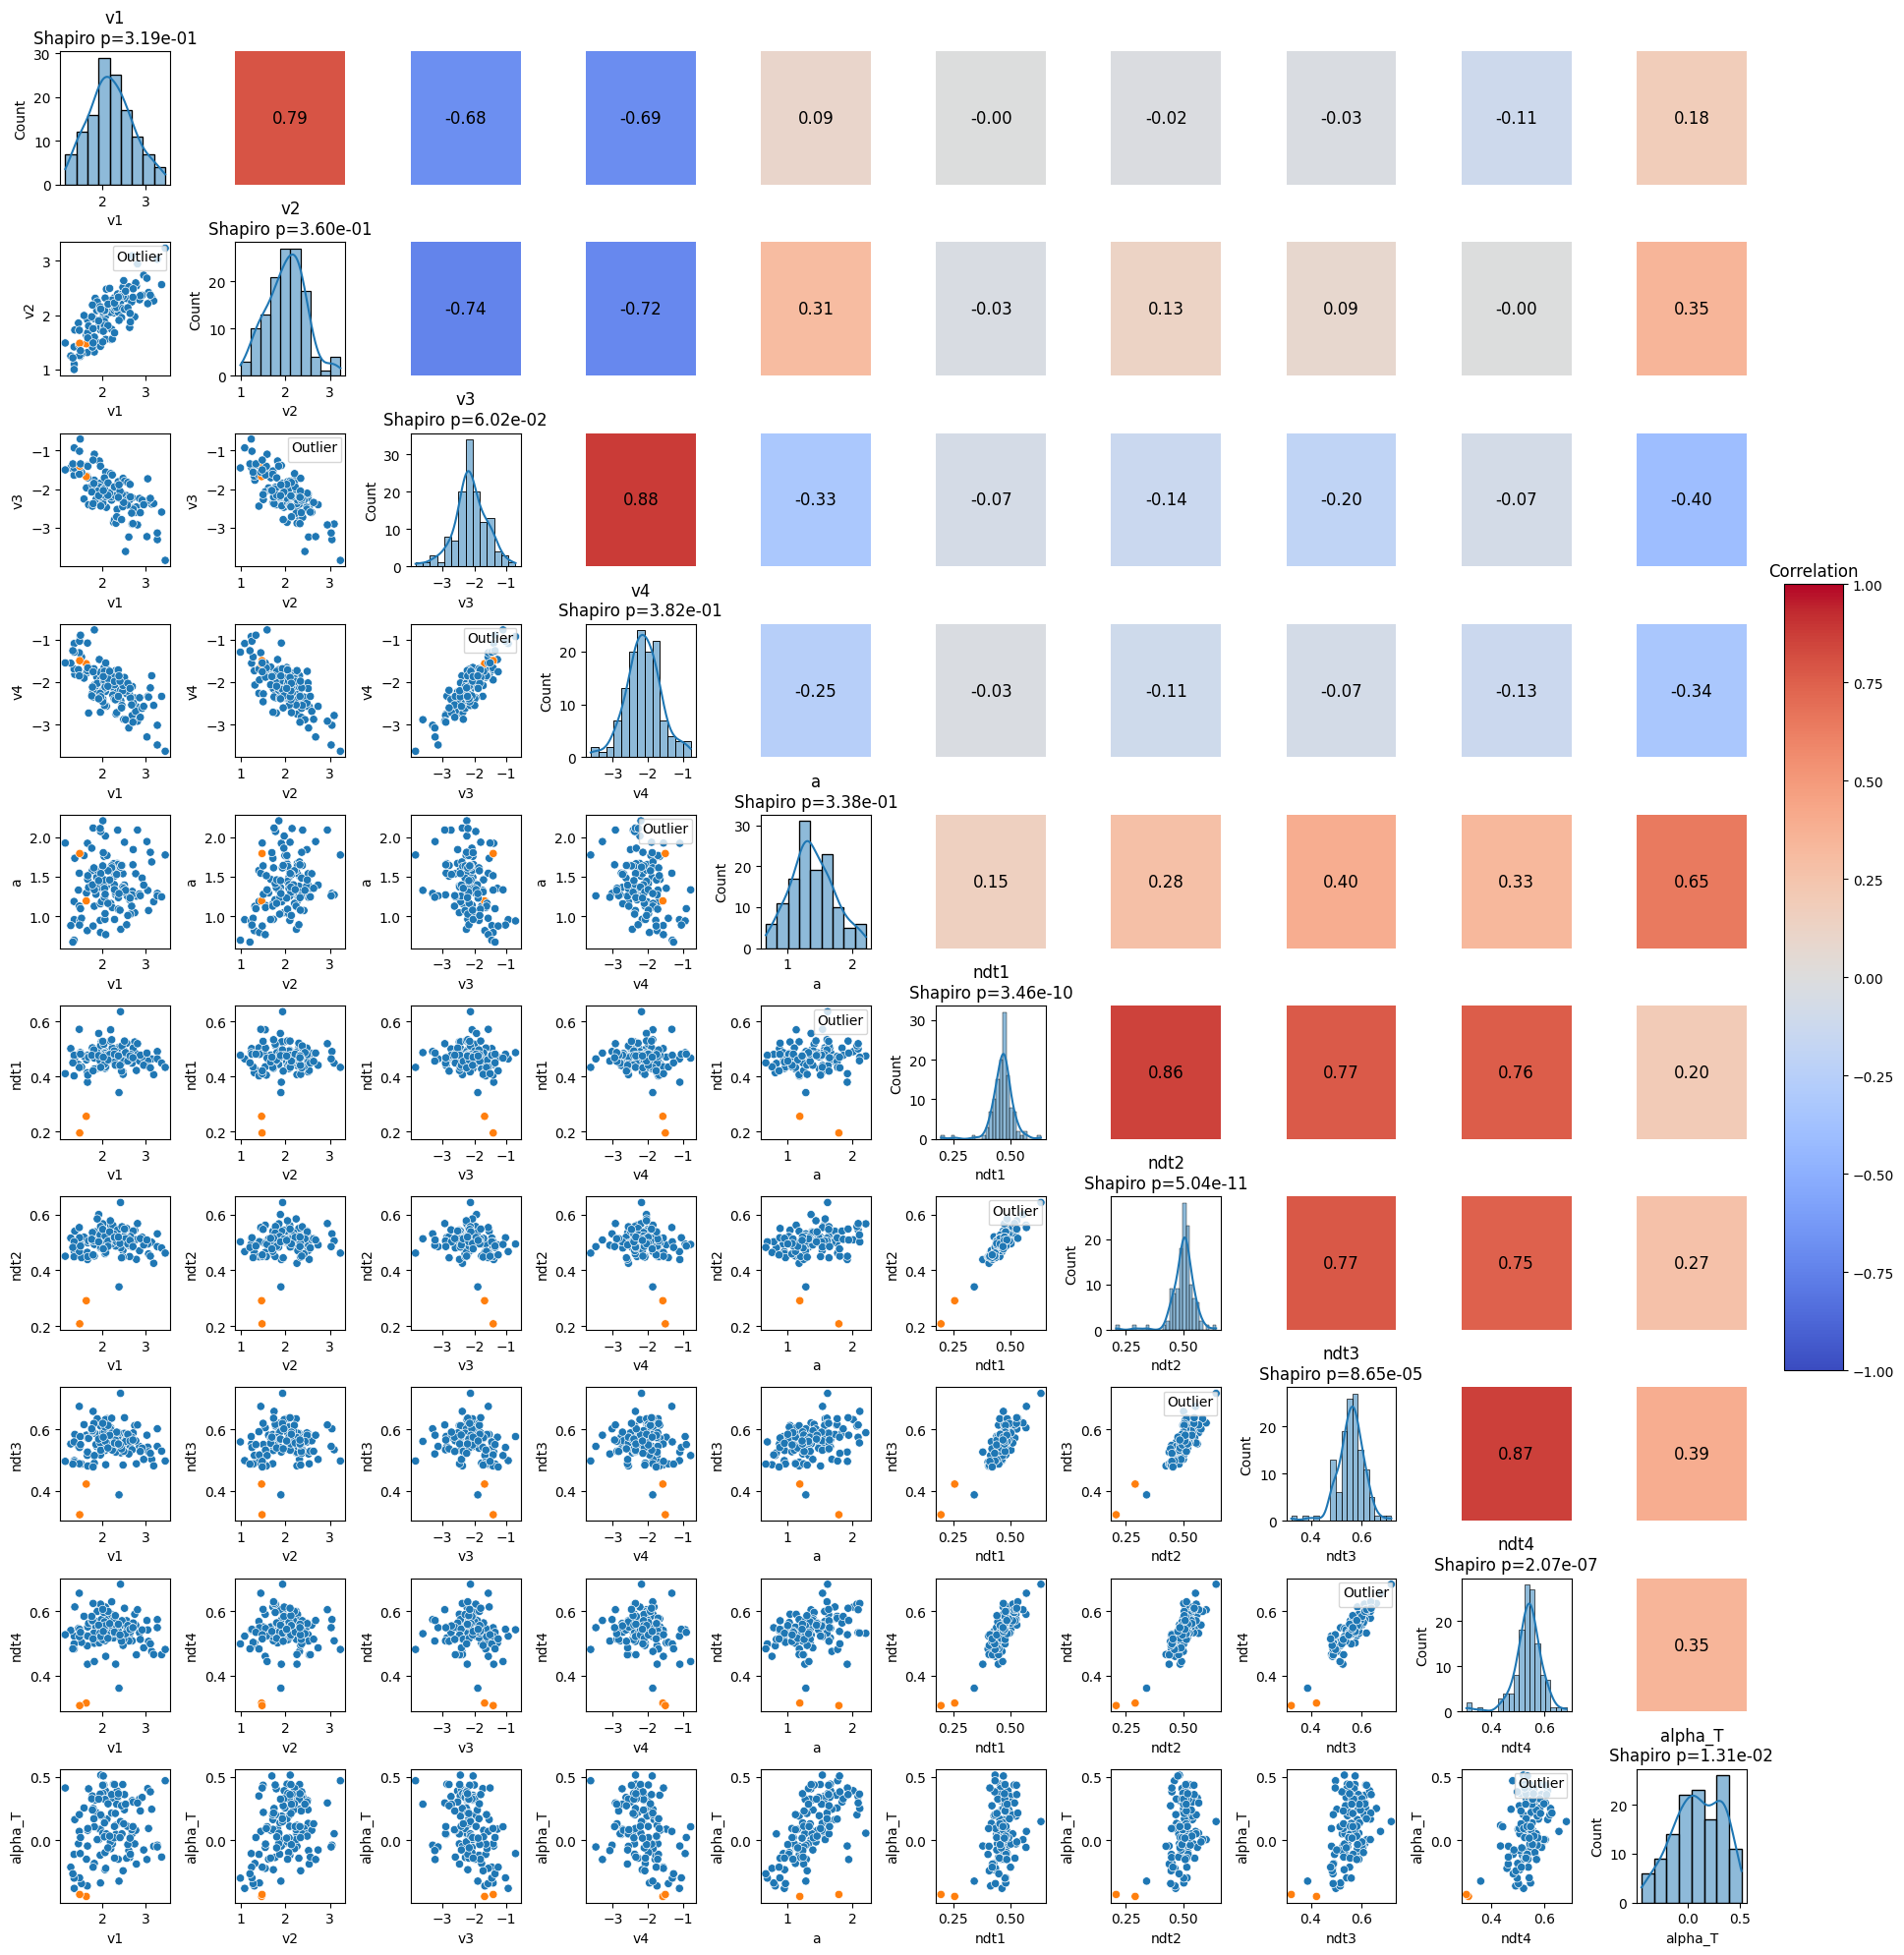

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Function to calculate Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Load your data
data = pd.read_csv('EZ_associative_learning_transformed_part_1.csv')  # Replace with your file path

# Define your parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 #'zr_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
 #'sndt_mean',
 #'alpha_mean',
  #  'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
   # 'accuracy_percentage_boxcox_after_arcsin'
                  ]

# Renaming for simplicity
renamed_params = {
    'v1_mean': 'v1', 'v2_mean': 'v2','v3_mean': 'v3','v4_mean': 'v4',
   # 'zr_mean': 'zr',
    'a_mean': 'a', 
    'ndt1_mean': 'ndt1','ndt2_mean': 'ndt2','ndt3_mean': 'ndt3','ndt4_mean': 'ndt4',
    #'sndt_mean': 'sndt', 'alpha_mean': 'alpha', 
    'alpha_mean_boxcox_after_arcsin': 'alpha_T', 
   # 'mean_log_rt': 'mean_log_rt', 
   # 'accuracy_percentage_boxcox_after_arcsin': 'acc_arc_box'
}
data_renamed = data.rename(columns=renamed_params)

# Prepare for outlier detection and correlation
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)
p_value = 0.001

# Process each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    threshold = stats.chi2.ppf((1 - p_value), df=2)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation

np.fill_diagonal(correlation_matrix.values, np.nan)
correlation_matrix_renamed = correlation_matrix.rename(columns=renamed_params, index=renamed_params)

# Shapiro-Wilk test
shapiro_results = {}
for param in selected_params:
    shapiro_test = stats.shapiro(data[param])
    shapiro_results[param] = shapiro_test[1]
shapiro_results_renamed = {renamed_params[key]: value for key, value in shapiro_results.items()}

# Create the visualization
# ... [rest of your code remains unchanged] ...

# Define the colormap for the heatmap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create the visualization
fig, axn = plt.subplots(len(renamed_params), len(renamed_params), figsize=(20, 20))
cbar_ax = fig.add_axes([.91, .3, .03, .4])  # Adjust the position of the colorbar

for i, param_i in enumerate(renamed_params.values()):
    for j, param_j in enumerate(renamed_params.values()):
        ax = axn[i, j]
        if i == j:
            sns.histplot(data_renamed[param_i], kde=True, ax=ax)
            ax.set_title(f'{param_i}\nShapiro p={shapiro_results_renamed[param_i]:.2e}')
        elif i > j:
            sns.scatterplot(data=data_renamed, x=param_j, y=param_i, hue=outliers, legend=False, ax=ax)
            if i == j + 1:
                ax.legend(loc='upper right', title='Outlier', prop={'size': 6})
            # ax.set_title(f'({param_j} vs {param_i})')
        else:
            corr_value = correlation_matrix_renamed.iloc[i, j]
            color = cmap((corr_value + 1) / 2)
            ax.add_patch(plt.Rectangle((0, 0), 1, 1, color=color))
            ax.text(0.5, 0.5, f'{corr_value:.2f}', ha='center', va='center', fontsize=12)
            ax.axis('off')

# Create a colorbar
norm = plt.Normalize(vmin=-1, vmax=1)
fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
cbar_ax.set_title('Correlation')

plt.tight_layout(rect=[0, 0, .9, 1])
plt.savefig('EZ_APT_S1_correlation_matrix_HeatMap_plot.png')  # Saves the plot to a file
plt.show()
plt.close()




In [3]:
import numpy as np
import scipy.stats as stats

# Define the safe Mahalanobis function
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Let's apply this to the first pair of parameters and check the result
pair = ['v1_mean', 'v2_mean']
data_pair = data[pair]

# Calculating Mahalanobis distance for the pair
mahal_distances = safe_mahalanobis(x=data_pair, data=data_pair)

# Determine the p-value threshold for outlier detection (p < 0.001)
p_value_threshold = 0.001

# Calculate the critical value for this p-value under the chi-squared distribution
critical_value = stats.chi2.ppf((1 - p_value_threshold), df=2)

# Identifying outliers
outliers = mahal_distances > critical_value

# Display the first few Mahalanobis distances and the outlier flags
mahal_distances[:5], outliers[:5]


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(array([1.25227085, 0.39540816, 1.58058461, 0.02656138, 3.3383527 ]),
 array([False, False, False, False, False]))

In [4]:
import numpy as np
import scipy.stats as stats

# Define the function for Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Select the first pair of parameters to demonstrate the process
params = ['v1_mean', 'v2_mean']
data_subset = data[params]

# Calculate the Mahalanobis distance for each observation
mahal_distances = safe_mahalanobis(x=data_subset, data=data_subset)

# Determine the threshold for outliers using the Chi-square distribution
p_value = 0.001
threshold = stats.chi2.ppf((1 - p_value), df=2)  # df is the number of variables, here 2

# Identify outliers
outliers = mahal_distances > threshold

# Print the number of outliers detected
num_outliers = np.sum(outliers)
num_outliers, threshold


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(0, 13.815510557964274)

In [5]:
import numpy as np
import scipy.stats as stats

# Define the function for Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Select the first pair of parameters to demonstrate the process
params = ['v1_mean', 'v2_mean']
data_subset = data[params]

# Calculate the Mahalanobis distance for each observation
mahal_distances = safe_mahalanobis(x=data_subset, data=data_subset)

# Determine the threshold for outliers using the Chi-square distribution
p_value = 0.001
threshold = stats.chi2.ppf((1 - p_value), df=2)  # df is the number of variables, here 2

# Identify outliers
outliers = mahal_distances > threshold

# Print the number of outliers detected
num_outliers = np.sum(outliers)
num_outliers, threshold


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(0, 13.815510557964274)

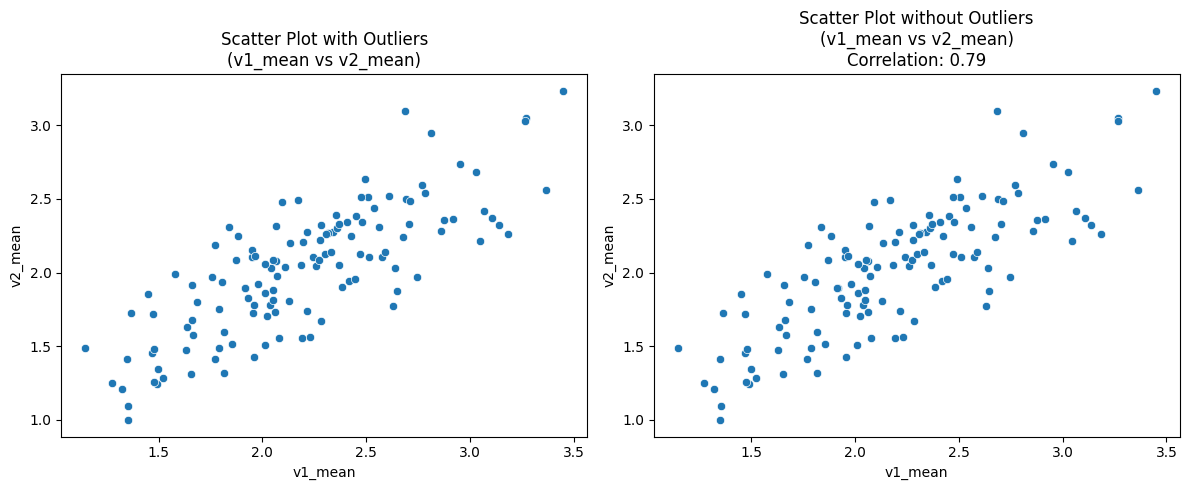

0.7937503065924183

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove outliers for the first pair
data_no_outliers = data_subset[~outliers]

# Calculate correlation for the first pair without outliers
correlation = data_no_outliers.corr().iloc[0, 1]

# Plotting to show the process
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot with outliers
sns.scatterplot(data=data_subset, x=params[0], y=params[1], ax=ax[0])
ax[0].set_title(f'Scatter Plot with Outliers\n({params[0]} vs {params[1]})')

# Scatter plot without outliers
sns.scatterplot(data=data_no_outliers, x=params[0], y=params[1], ax=ax[1])
ax[1].set_title(f'Scatter Plot without Outliers\n({params[0]} vs {params[1]})\nCorrelation: {correlation:.2f}')

plt.tight_layout()
plt.show()

correlation


In [7]:
from itertools import combinations

# List of all selected parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
 'alpha_mean',
    'accuracy_percentage',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin']

# Preparing a DataFrame to store correlations
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)

# Calculate Mahalanobis distance and correlations for each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation  # Mirror the matrix

# Fill diagonal with NaN as we will put histograms there
np.fill_diagonal(correlation_matrix.values, np.nan)

correlation_matrix.head()  # Displaying the first few rows for review


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

v1_mean   v2_mean   v3_mean   v4_mean    a_mean ndt1_mean ndt2_mean  \
v1_mean       NaN   0.79375 -0.683517 -0.692342  0.094165 -0.004313 -0.018816   
v2_mean   0.79375       NaN -0.737342 -0.718563  0.308571 -0.034336  0.131732   
v3_mean -0.683517 -0.737342       NaN  0.877311  -0.32564 -0.069066 -0.135647   
v4_mean -0.692342 -0.718563  0.877311       NaN -0.253274 -0.030356 -0.105688   
a_mean   0.094165  0.308571  -0.32564 -0.253274       NaN  0.149346  0.275804   

        ndt3_mean ndt4_mean alpha_mean accuracy_percentage mean_log_rt  \
v1_mean -0.029051 -0.113241   0.240517            0.583926   -0.321355   
v2_mean  0.085881 -0.001485   0.417571            0.716776    -0.11354   
v3_mean -0.195919   -0.0717  -0.421317           -0.758934    0.099943   
v4_mean -0.074765 -0.126341  -0.364816           -0.728743    0.168153   
a_mean   0.395168   0.33384   0.656683            0.718369    0.793171   

        alpha_mean_boxcox_after_arcsin accuracy_percentage_boxcox_after_arcsin  
v1_mean                       0.183916                                0.572928  
v2_mean                       0.350962                                0.706274  
v3_mean                       -0.39981                               -0.769065  
v4_mean                      -0.335805                               -0.713493  
a_mean                        0.648258                                0.768436

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

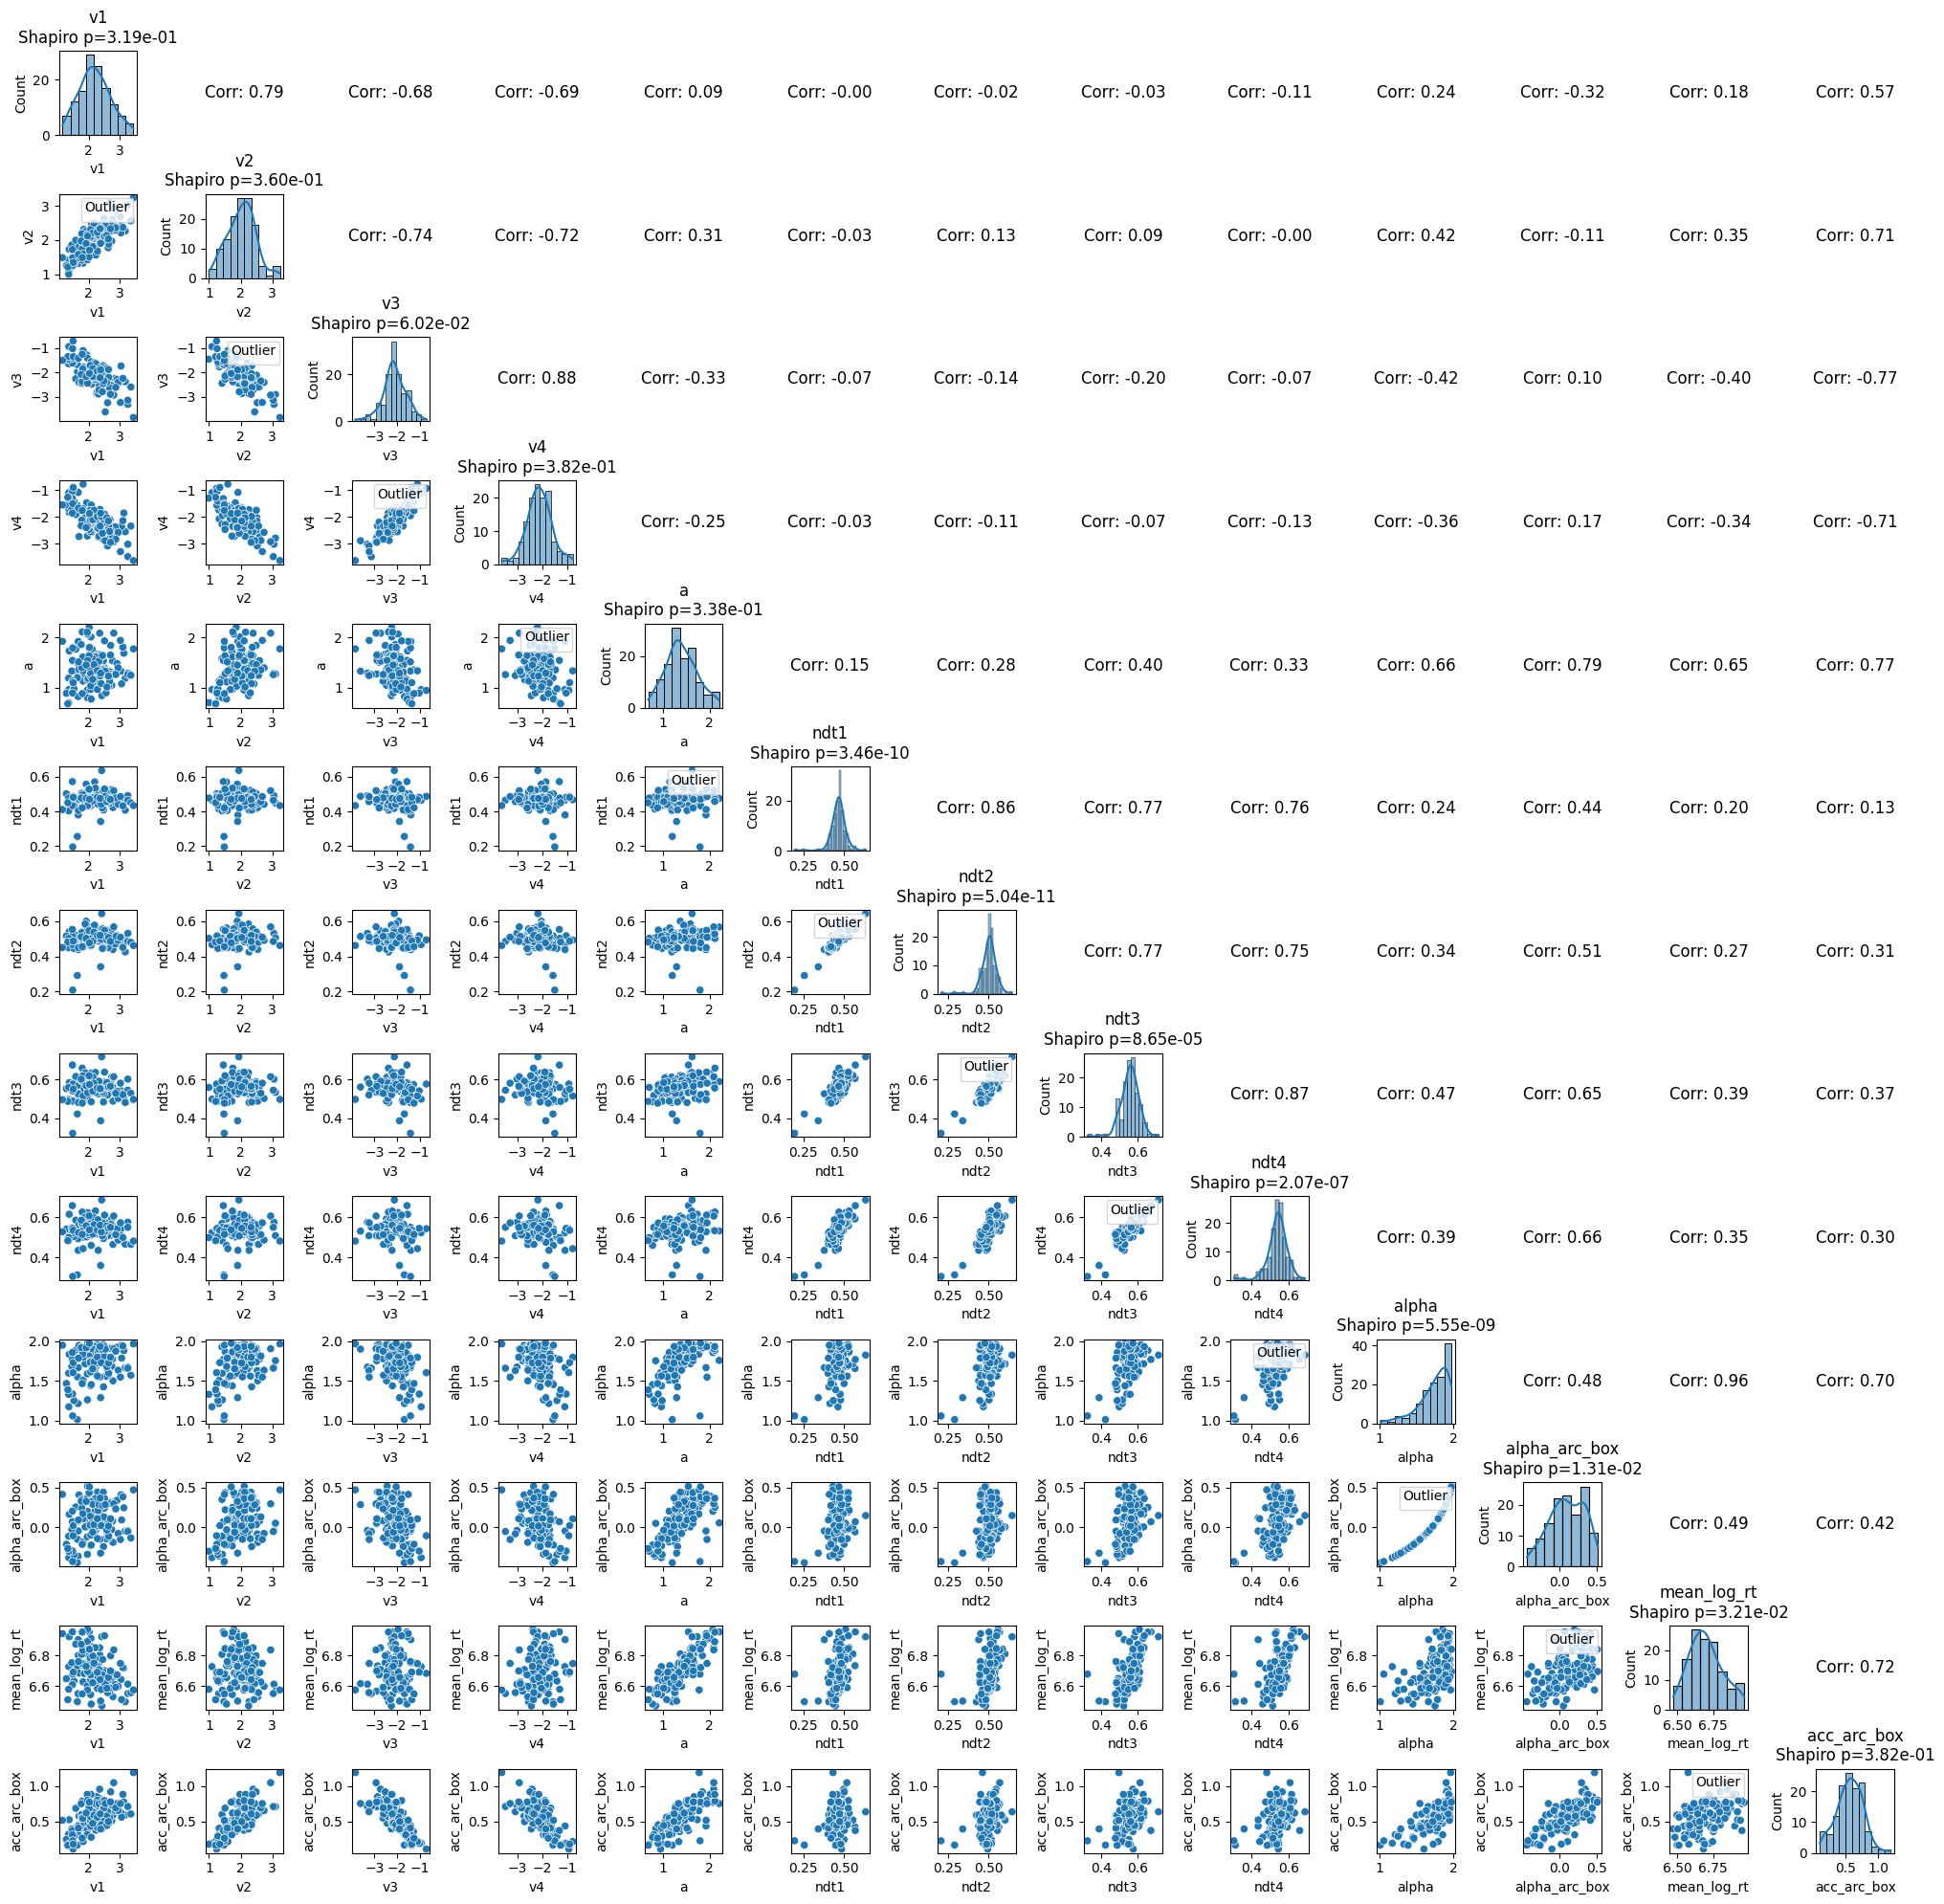

In [8]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Function to calculate Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Load your data
data = pd.read_csv('EZ_associative_learning_transformed_part_1.csv')  # Replace with your file path

# Define your parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
 'alpha_mean',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin']

# Renaming for simplicity
renamed_params = {
    'v1_mean': 'v1', 'v2_mean': 'v2','v3_mean': 'v3','v4_mean': 'v4',
    'a_mean': 'a', 
    'ndt1_mean': 'ndt1','ndt2_mean': 'ndt2','ndt3_mean': 'ndt3','ndt4_mean': 'ndt4',
   'alpha_mean': 'alpha', 
    'alpha_mean_boxcox_after_arcsin': 'alpha_arc_box', 
    'mean_log_rt': 'mean_log_rt', 
    'accuracy_percentage_boxcox_after_arcsin': 'acc_arc_box'
}
data_renamed = data.rename(columns=renamed_params)

# Prepare for outlier detection and correlation
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)
p_value = 0.001

# Process each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    threshold = stats.chi2.ppf((1 - p_value), df=2)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation

np.fill_diagonal(correlation_matrix.values, np.nan)
correlation_matrix_renamed = correlation_matrix.rename(columns=renamed_params, index=renamed_params)

# Shapiro-Wilk test
shapiro_results = {}
for param in selected_params:
    shapiro_test = stats.shapiro(data[param])
    shapiro_results[param] = shapiro_test[1]
shapiro_results_renamed = {renamed_params[key]: value for key, value in shapiro_results.items()}

# Create the visualization
plt.figure(figsize=(20, 20))
for i, param_i in enumerate(renamed_params.values()):
    for j, param_j in enumerate(renamed_params.values()):
        plt.subplot(len(renamed_params), len(renamed_params), i*len(renamed_params) + j + 1)
        if i == j:
            sns.histplot(data_renamed[param_i], kde=True)
            plt.title(f'{param_i}\nShapiro p={shapiro_results_renamed[param_i]:.2e}')
        elif i > j:
            scatter_plot = sns.scatterplot(data=data_renamed, x=param_j, y=param_i, hue=outliers, legend=False)
            if i == j + 1:
                scatter_plot.legend(loc='upper right', title='Outlier', prop={'size': 6})
          #  plt.title(f'Scatter Plot\n({param_j} vs {param_i})')
        else:
            plt.text(0.5, 0.5, f'Corr: {correlation_matrix_renamed.iloc[i, j]:.2f}', 
                     horizontalalignment='center', verticalalignment='center', fontsize=12)
            plt.axis('off')

plt.tight_layout()
plt.show()
plt.savefig('EZ_APT_S1_correlation_matrix_plot.png')  # Saves the plot to a file
plt.close()



In [9]:
correlation_matrix_renamed.to_csv('EZ_Distinct_APT_s1_correlation_matrix.csv')

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

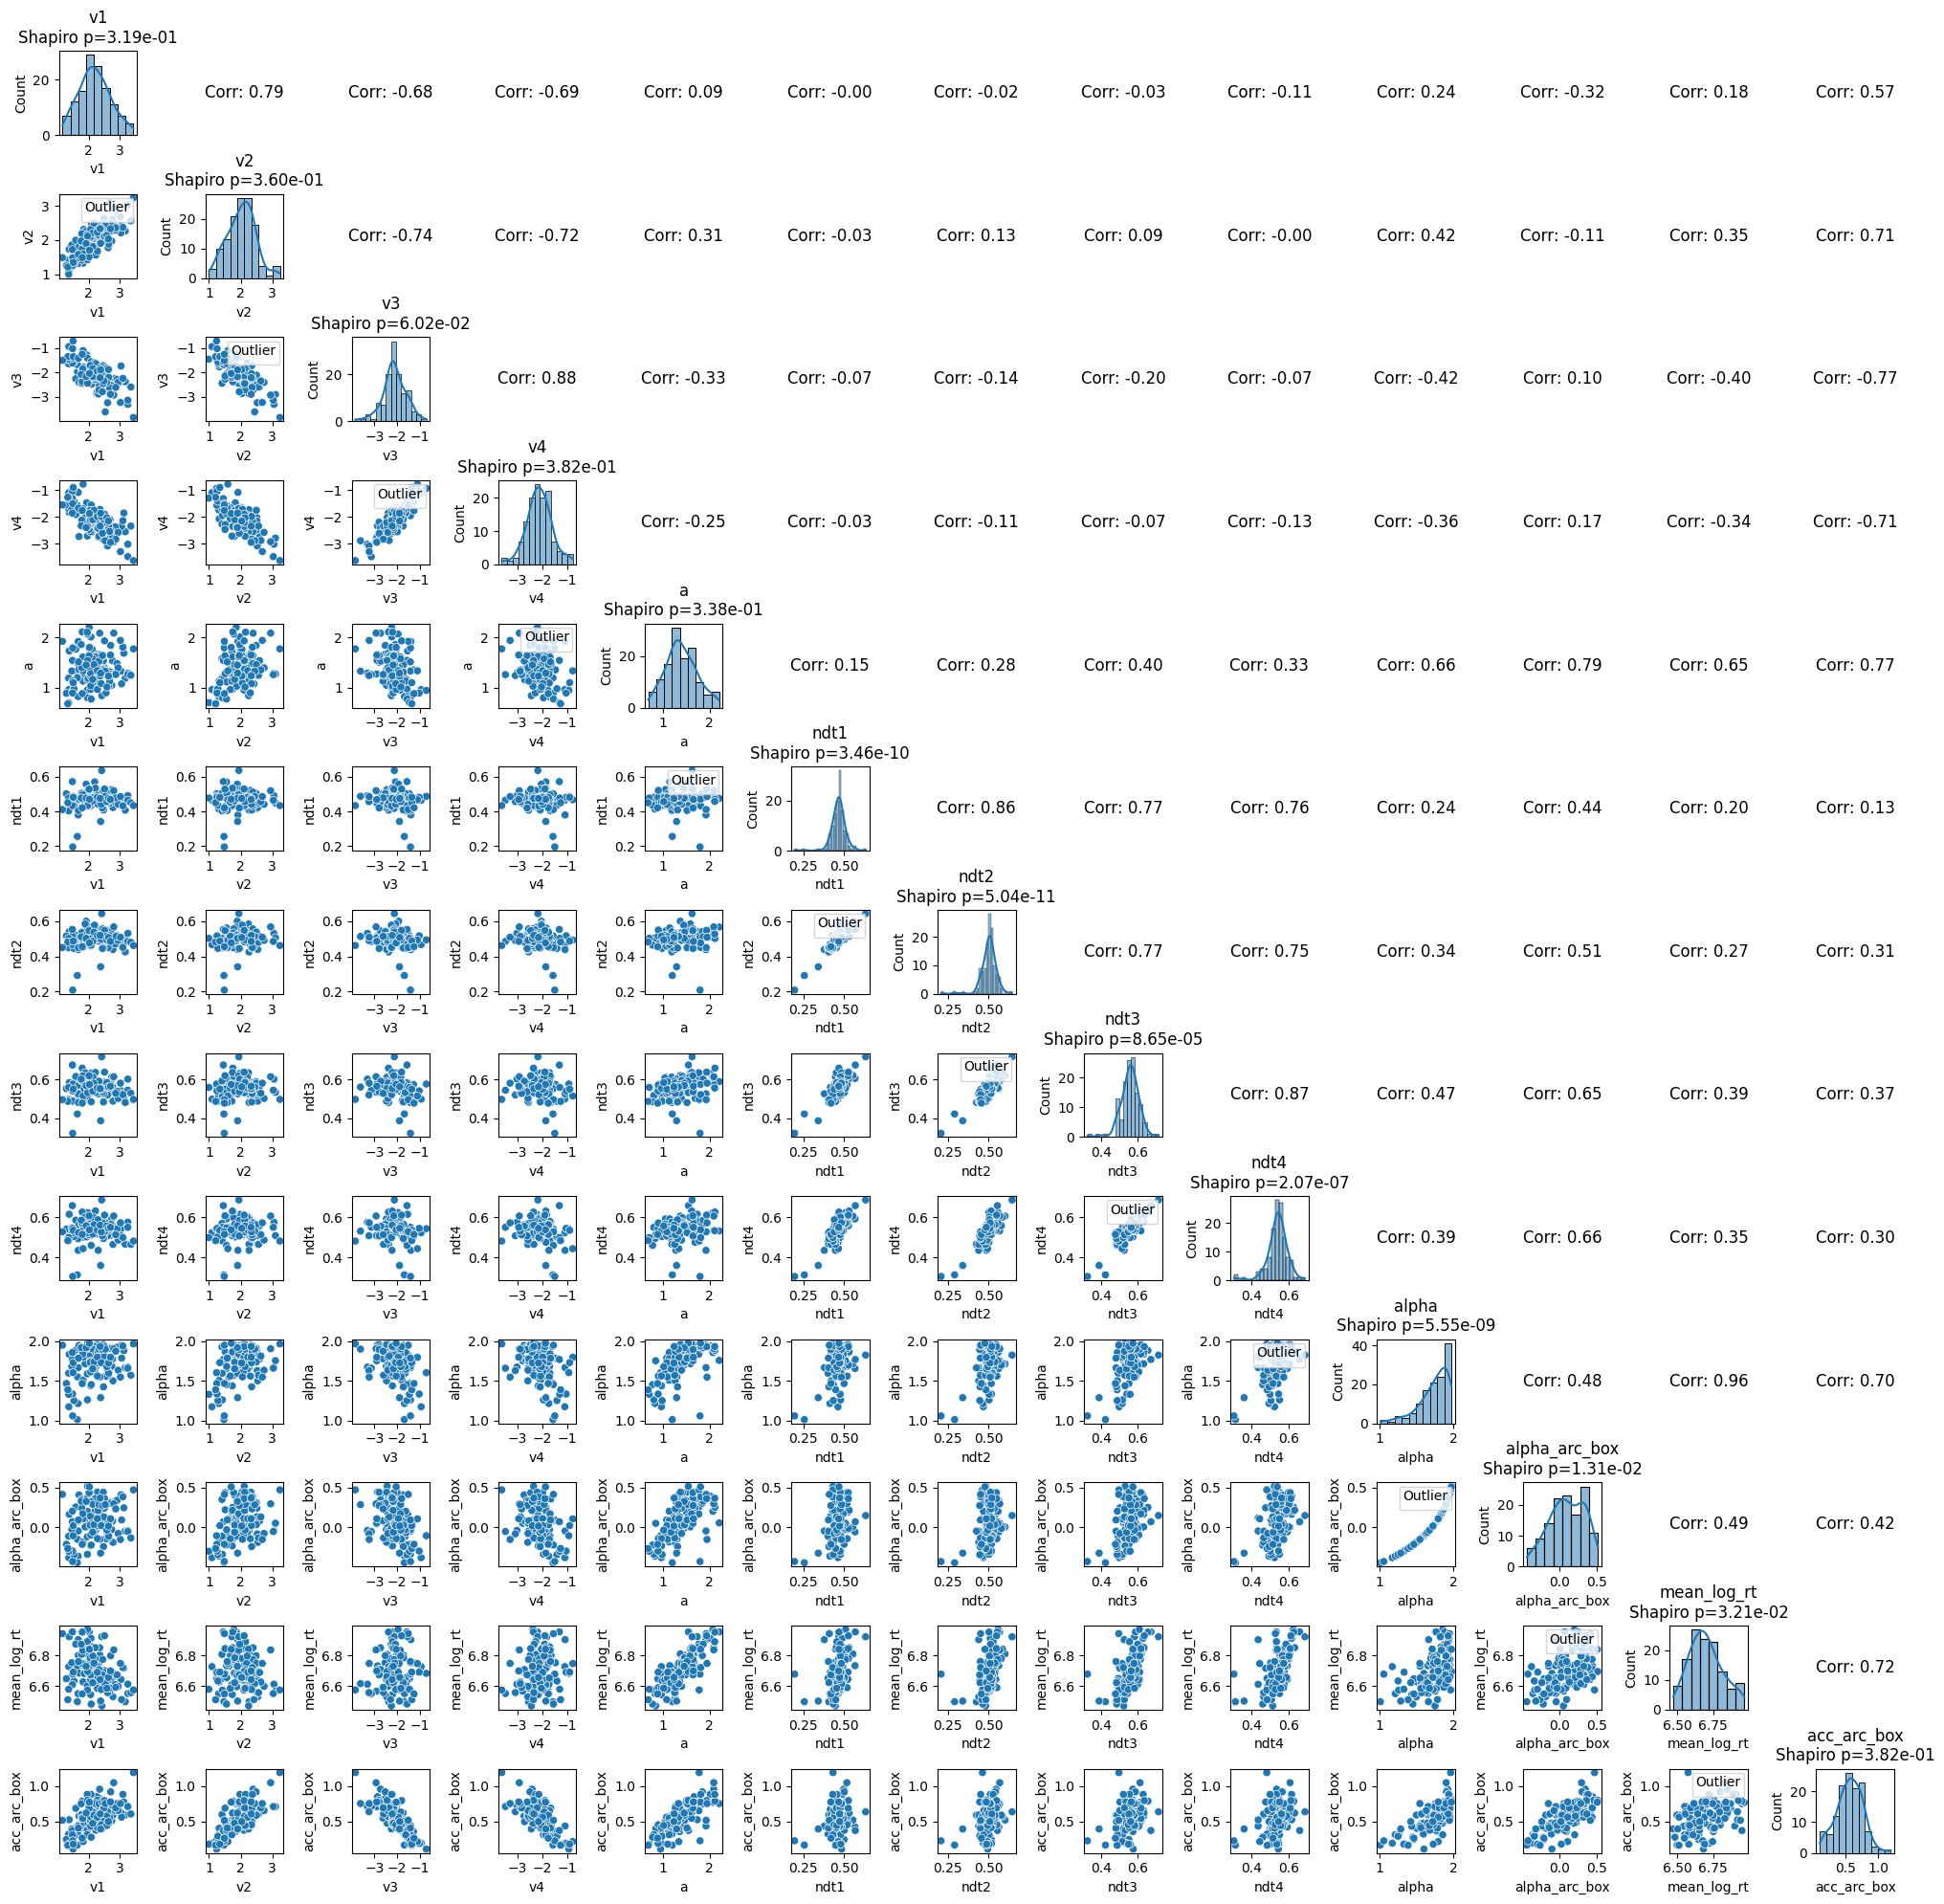

In [10]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Function to calculate Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Load your data
data = pd.read_csv('EZ_associative_learning_transformed_part_1.csv')  # Replace with your file path

# Define your parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
# 'sndt_mean',
 'alpha_mean',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin']

# Renaming for simplicity
renamed_params = {
    'v1_mean': 'v1', 'v2_mean': 'v2','v3_mean': 'v3','v4_mean': 'v4',
    'a_mean': 'a', 
    'ndt1_mean': 'ndt1','ndt2_mean': 'ndt2','ndt3_mean': 'ndt3','ndt4_mean': 'ndt4',
    #'sndt_mean': 'sndt',
    'alpha_mean': 'alpha', 
    'alpha_mean_boxcox_after_arcsin': 'alpha_arc_box', 
    'mean_log_rt': 'mean_log_rt', 
    'accuracy_percentage_boxcox_after_arcsin': 'acc_arc_box'
}
data_renamed = data.rename(columns=renamed_params)

# Prepare for outlier detection and correlation
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)
p_value = 0.001

# Process each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    threshold = stats.chi2.ppf((1 - p_value), df=2)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation

np.fill_diagonal(correlation_matrix.values, np.nan)
correlation_matrix_renamed = correlation_matrix.rename(columns=renamed_params, index=renamed_params)

# Shapiro-Wilk test
shapiro_results = {}
for param in selected_params:
    shapiro_test = stats.shapiro(data[param])
    shapiro_results[param] = shapiro_test[1]
shapiro_results_renamed = {renamed_params[key]: value for key, value in shapiro_results.items()}

# Create the visualization
plt.figure(figsize=(20, 20))
for i, param_i in enumerate(renamed_params.values()):
    for j, param_j in enumerate(renamed_params.values()):
        plt.subplot(len(renamed_params), len(renamed_params), i*len(renamed_params) + j + 1)
        if i == j:
            sns.histplot(data_renamed[param_i], kde=True)
            plt.title(f'{param_i}\nShapiro p={shapiro_results_renamed[param_i]:.2e}')
        elif i > j:
            scatter_plot = sns.scatterplot(data=data_renamed, x=param_j, y=param_i, hue=outliers, legend=False)
            if i == j + 1:
                scatter_plot.legend(loc='upper right', title='Outlier', prop={'size': 6})
           # plt.title(f'Scatter Plot\n({param_j} vs {param_i})')
        else:
            plt.text(0.5, 0.5, f'Corr: {correlation_matrix_renamed.iloc[i, j]:.2f}', 
                     horizontalalignment='center', verticalalignment='center', fontsize=12)
            plt.axis('off')

plt.tight_layout()
plt.savefig('EZ_APT_S1_correlation_matrix_plot.png')  # Saves the plot to a file
plt.show()
plt.close()



In [11]:
correlation_matrix_renamed

v1        v2        v3        v4         a      ndt1  \
v1                  NaN   0.79375 -0.683517 -0.692342  0.094165 -0.004313   
v2              0.79375       NaN -0.737342 -0.718563  0.308571 -0.034336   
v3            -0.683517 -0.737342       NaN  0.877311  -0.32564 -0.069066   
v4            -0.692342 -0.718563  0.877311       NaN -0.253274 -0.030356   
a              0.094165  0.308571  -0.32564 -0.253274       NaN  0.149346   
ndt1          -0.004313 -0.034336 -0.069066 -0.030356  0.149346       NaN   
ndt2          -0.018816  0.131732 -0.135647 -0.105688  0.275804  0.856855   
ndt3          -0.029051  0.085881 -0.195919 -0.074765  0.395168  0.771936   
ndt4          -0.113241 -0.001485   -0.0717 -0.126341   0.33384  0.759849   
alpha          0.240517  0.417571 -0.421317 -0.364816  0.656683  0.243359   
mean_log_rt   -0.321355  -0.11354  0.099943  0.168153  0.793171  0.443871   
alpha_arc_box  0.183916  0.350962  -0.39981 -0.335805  0.648258  0.196374   
acc_arc_box    0.572928  0.706274 -0.769065 -0.713493  0.768436  0.128613   

                   ndt2      ndt3      ndt4     alpha mean_log_rt  \
v1            -0.018816 -0.029051 -0.113241  0.240517   -0.321355   
v2             0.131732  0.085881 -0.001485  0.417571    -0.11354   
v3            -0.135647 -0.195919   -0.0717 -0.421317    0.099943   
v4            -0.105688 -0.074765 -0.126341 -0.364816    0.168153   
a              0.275804  0.395168   0.33384  0.656683    0.793171   
ndt1           0.856855  0.771936  0.759849  0.243359    0.443871   
ndt2                NaN  0.774139  0.746729  0.336309    0.509161   
ndt3           0.774139       NaN  0.865983  0.474053     0.65002   
ndt4           0.746729  0.865983       NaN  0.390227    0.655834   
alpha          0.336309  0.474053  0.390227       NaN     0.48388   
mean_log_rt    0.509161   0.65002  0.655834   0.48388         NaN   
alpha_arc_box  0.269648   0.39173  0.348421  0.964924    0.485812   
acc_arc_box    0.307673  0.368455  0.298732  0.704035    0.417856   

              alpha_arc_box acc_arc_box  
v1                 0.183916    0.572928  
v2                 0.350962    0.706274  
v3                 -0.39981   -0.769065  
v4                -0.335805   -0.713493  
a                  0.648258    0.768436  
ndt1               0.196374    0.128613  
ndt2               0.269648    0.307673  
ndt3                0.39173    0.368455  
ndt4               0.348421    0.298732  
alpha              0.964924    0.704035  
mean_log_rt        0.485812    0.417856  
alpha_arc_box           NaN    0.722525  
acc_arc_box        0.722525         NaN

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

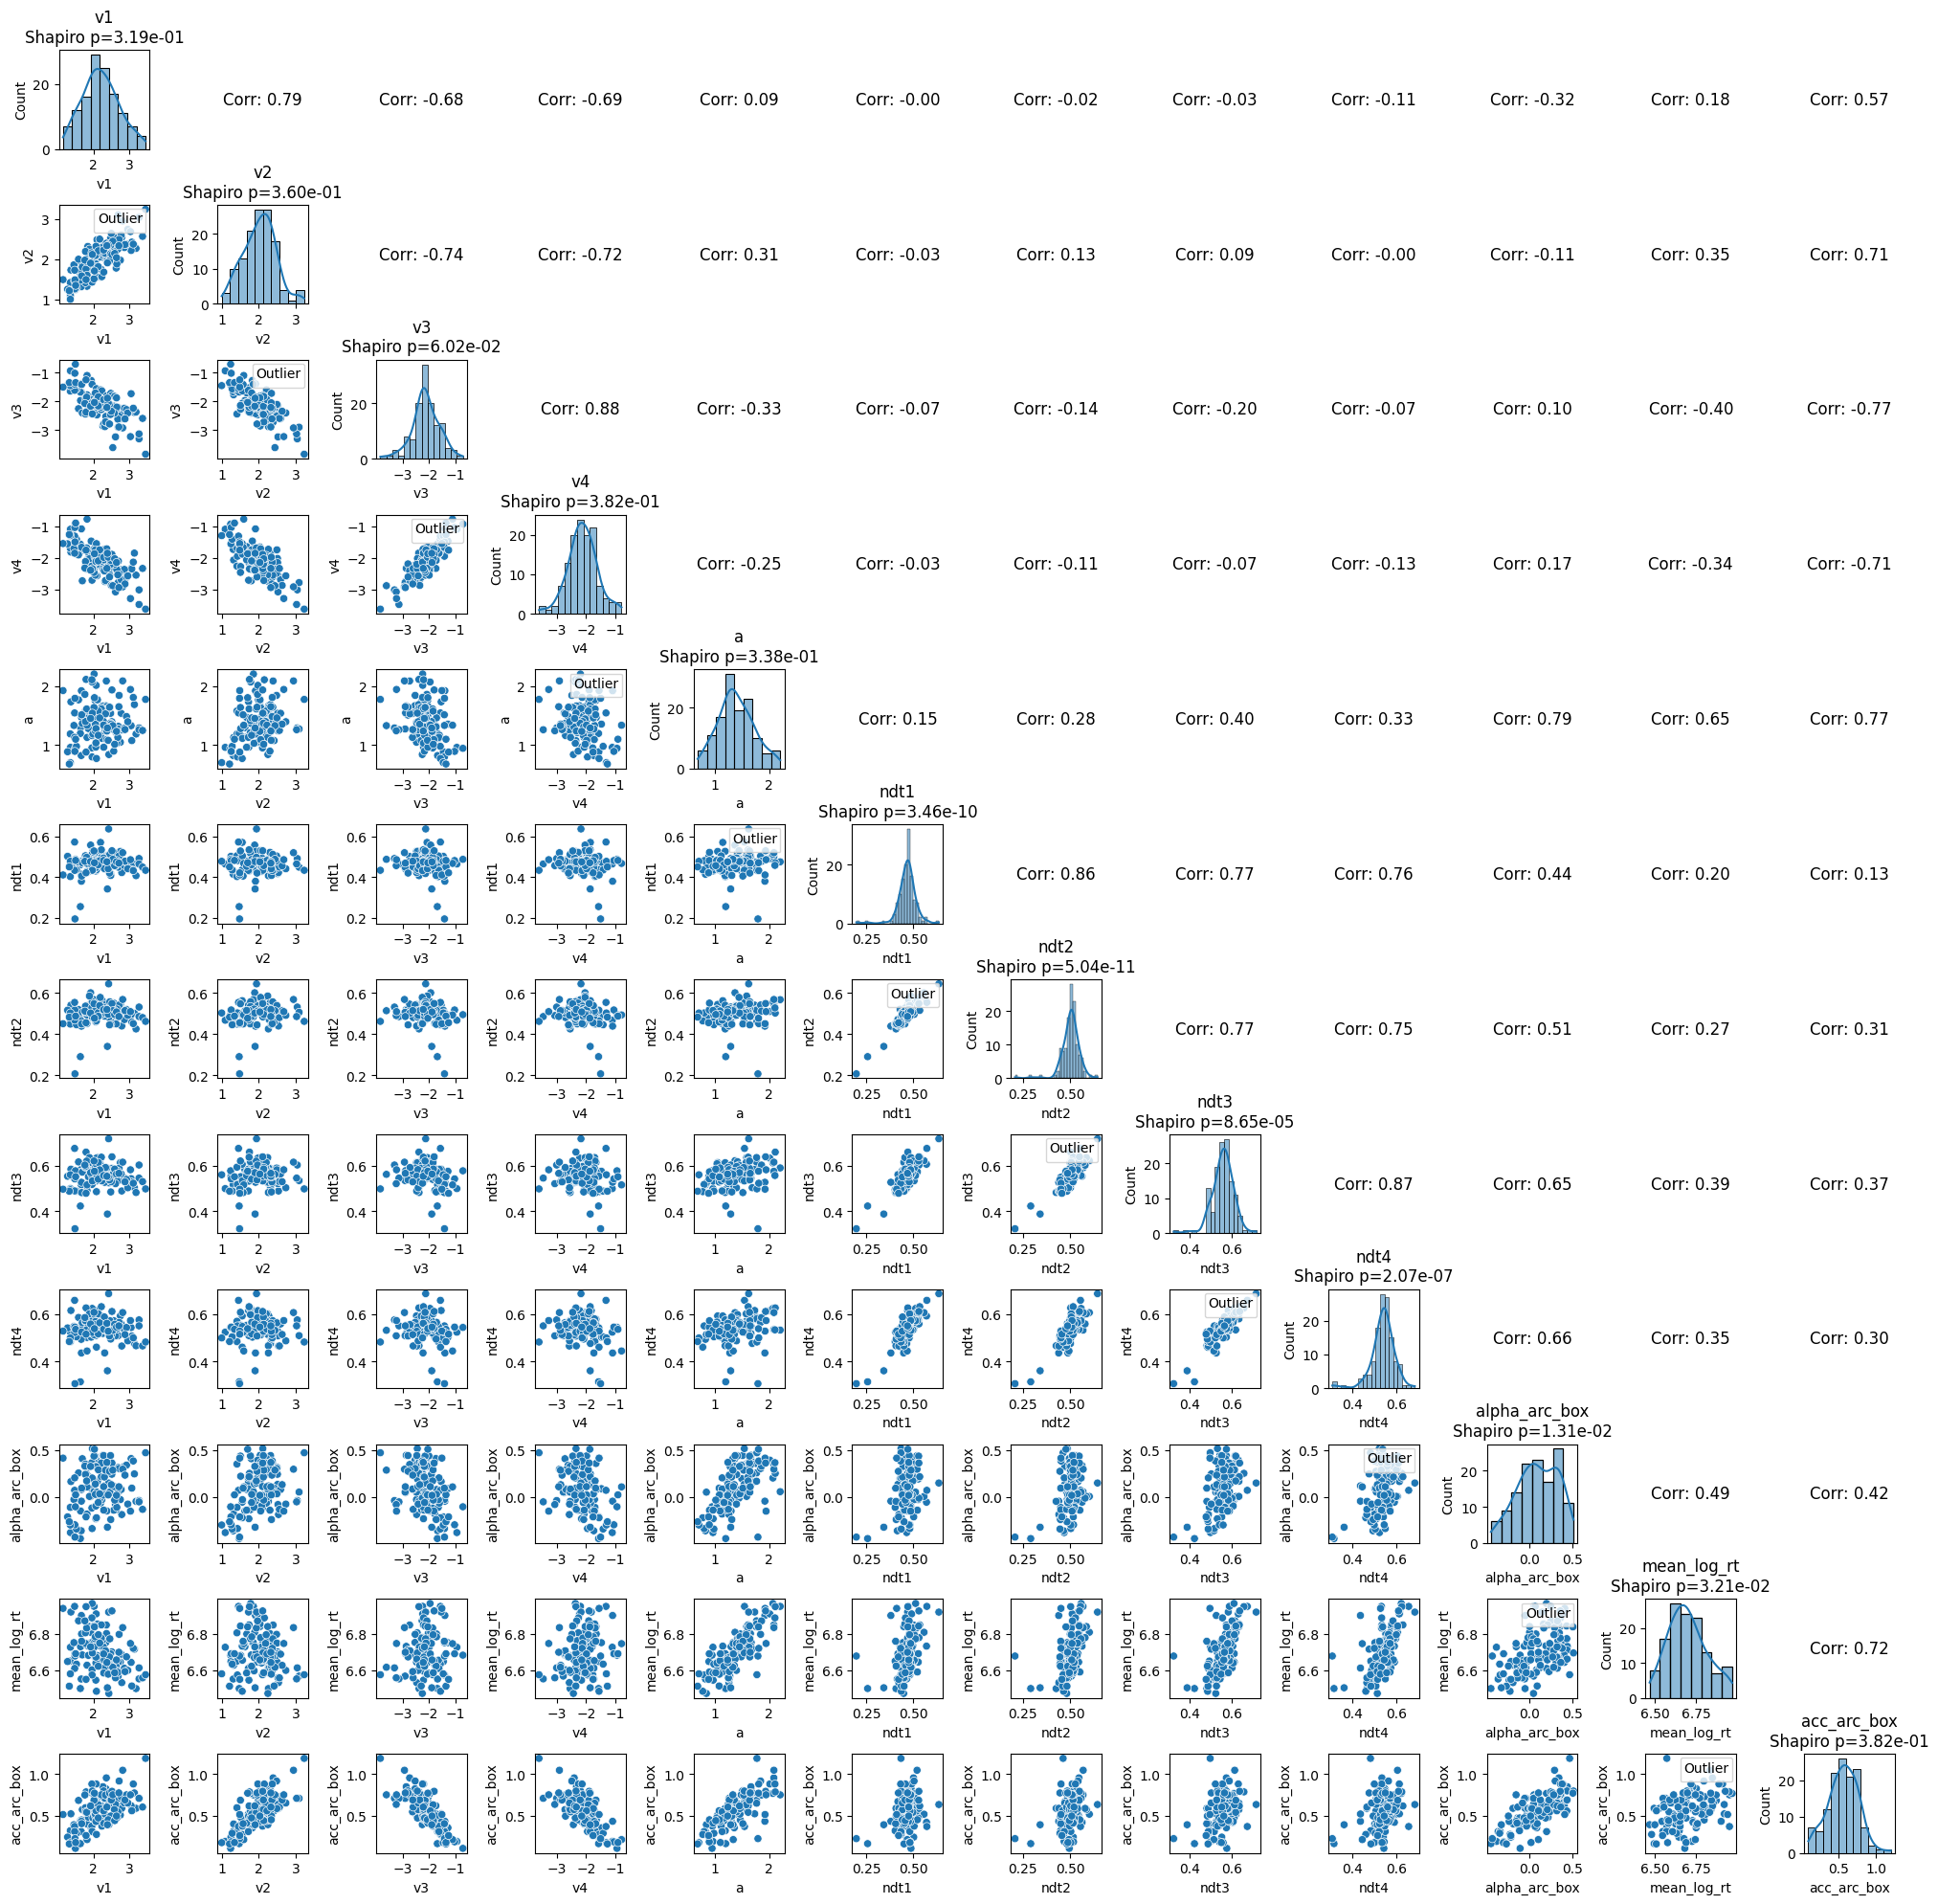

In [12]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Function to calculate Mahalanobis distance
def safe_mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

# Load your data
data = pd.read_csv('EZ_associative_learning_transformed_part_1.csv')  # Replace with your file path

# Define your parameters
selected_params = ['v1_mean',
 'v2_mean',
 'v3_mean',
 'v4_mean',
# 'zr_mean',
 'a_mean',
 'ndt1_mean',
 'ndt2_mean',
 'ndt3_mean',
 'ndt4_mean',
# 'sndt_mean',
# 'alpha_mean',
    'mean_log_rt',
    'alpha_mean_boxcox_after_arcsin',
    'accuracy_percentage_boxcox_after_arcsin']

# Renaming for simplicity
renamed_params = {
    'v1_mean': 'v1', 'v2_mean': 'v2','v3_mean': 'v3','v4_mean': 'v4',
   # 'zr_mean': 'zr', 
    'a_mean': 'a', 
    'ndt1_mean': 'ndt1','ndt2_mean': 'ndt2','ndt3_mean': 'ndt3','ndt4_mean': 'ndt4',
    #'sndt_mean': 'sndt', 'alpha_mean': 'alpha', 
    'alpha_mean_boxcox_after_arcsin': 'alpha_arc_box', 
    'mean_log_rt': 'mean_log_rt', 
    'accuracy_percentage_boxcox_after_arcsin': 'acc_arc_box'
}
data_renamed = data.rename(columns=renamed_params)

# Prepare for outlier detection and correlation
correlation_matrix = pd.DataFrame(index=selected_params, columns=selected_params)
p_value = 0.001

# Process each pair of parameters
for pair in combinations(selected_params, 2):
    pair_data = data[list(pair)]
    mahal_distances = safe_mahalanobis(x=pair_data, data=pair_data)
    threshold = stats.chi2.ppf((1 - p_value), df=2)
    outliers = mahal_distances > threshold
    correlation = pair_data[~outliers].corr().iloc[0, 1]
    correlation_matrix.loc[pair[0], pair[1]] = correlation
    correlation_matrix.loc[pair[1], pair[0]] = correlation

np.fill_diagonal(correlation_matrix.values, np.nan)
correlation_matrix_renamed = correlation_matrix.rename(columns=renamed_params, index=renamed_params)

# Shapiro-Wilk test
shapiro_results = {}
for param in selected_params:
    shapiro_test = stats.shapiro(data[param])
    shapiro_results[param] = shapiro_test[1]
shapiro_results_renamed = {renamed_params[key]: value for key, value in shapiro_results.items()}

# Create the visualization
plt.figure(figsize=(20, 20))
for i, param_i in enumerate(renamed_params.values()):
    for j, param_j in enumerate(renamed_params.values()):
        plt.subplot(len(renamed_params), len(renamed_params), i*len(renamed_params) + j + 1)
        if i == j:
            sns.histplot(data_renamed[param_i], kde=True)
            plt.title(f'{param_i}\nShapiro p={shapiro_results_renamed[param_i]:.2e}')
        elif i > j:
            scatter_plot = sns.scatterplot(data=data_renamed, x=param_j, y=param_i, hue=outliers, legend=False)
            if i == j + 1:
                scatter_plot.legend(loc='upper right', title='Outlier', prop={'size': 6})
           # plt.title(f'Scatter Plot\n({param_j} vs {param_i})')
        else:
            plt.text(0.5, 0.5, f'Corr: {correlation_matrix_renamed.iloc[i, j]:.2f}', 
                     horizontalalignment='center', verticalalignment='center', fontsize=12)
            plt.axis('off')

plt.tight_layout()
plt.show()
plt.savefig('EZ_APT_S1_correlation_matrix_plot.png')  # Saves the plot to a file
plt.close()



In [13]:
correlation_matrix_renamed

v1        v2        v3        v4         a      ndt1  \
v1                  NaN   0.79375 -0.683517 -0.692342  0.094165 -0.004313   
v2              0.79375       NaN -0.737342 -0.718563  0.308571 -0.034336   
v3            -0.683517 -0.737342       NaN  0.877311  -0.32564 -0.069066   
v4            -0.692342 -0.718563  0.877311       NaN -0.253274 -0.030356   
a              0.094165  0.308571  -0.32564 -0.253274       NaN  0.149346   
ndt1          -0.004313 -0.034336 -0.069066 -0.030356  0.149346       NaN   
ndt2          -0.018816  0.131732 -0.135647 -0.105688  0.275804  0.856855   
ndt3          -0.029051  0.085881 -0.195919 -0.074765  0.395168  0.771936   
ndt4          -0.113241 -0.001485   -0.0717 -0.126341   0.33384  0.759849   
mean_log_rt   -0.321355  -0.11354  0.099943  0.168153  0.793171  0.443871   
alpha_arc_box  0.183916  0.350962  -0.39981 -0.335805  0.648258  0.196374   
acc_arc_box    0.572928  0.706274 -0.769065 -0.713493  0.768436  0.128613   

                   ndt2      ndt3      ndt4 mean_log_rt alpha_arc_box  \
v1            -0.018816 -0.029051 -0.113241   -0.321355      0.183916   
v2             0.131732  0.085881 -0.001485    -0.11354      0.350962   
v3            -0.135647 -0.195919   -0.0717    0.099943      -0.39981   
v4            -0.105688 -0.074765 -0.126341    0.168153     -0.335805   
a              0.275804  0.395168   0.33384    0.793171      0.648258   
ndt1           0.856855  0.771936  0.759849    0.443871      0.196374   
ndt2                NaN  0.774139  0.746729    0.509161      0.269648   
ndt3           0.774139       NaN  0.865983     0.65002       0.39173   
ndt4           0.746729  0.865983       NaN    0.655834      0.348421   
mean_log_rt    0.509161   0.65002  0.655834         NaN      0.485812   
alpha_arc_box  0.269648   0.39173  0.348421    0.485812           NaN   
acc_arc_box    0.307673  0.368455  0.298732    0.417856      0.722525   

              acc_arc_box  
v1               0.572928  
v2               0.706274  
v3              -0.769065  
v4              -0.713493  
a                0.768436  
ndt1             0.128613  
ndt2             0.307673  
ndt3             0.368455  
ndt4             0.298732  
mean_log_rt      0.417856  
alpha_arc_box    0.722525  
acc_arc_box           NaN